In [ ]:
# Chess Object Detection Test

In [1]:
import os

from ultralytics import YOLO
import cv2


VIDEOS_DIR = os.path.join('.', 'testVideos')

video_path = os.path.join(VIDEOS_DIR, 'queen1.mp4')
video_path_out = '{}_out.mp4'.format(video_path)

cap = cv2.VideoCapture(video_path)
ret, frame = cap.read()
H, W, _ = frame.shape
out = cv2.VideoWriter(video_path_out, cv2.VideoWriter_fourcc(*'MP4V'), int(cap.get(cv2.CAP_PROP_FPS)), (W, H))

model_path = os.path.join('.', 'runs', 'detect', 'train2', 'weights', 'best.pt')

# Load a model
model = YOLO(model_path)  # load a custom model

threshold = 0.3

while ret:

    results = model(frame)[0]

    for result in results.boxes.data.tolist():
        x1, y1, x2, y2, score, class_id = result

        if score > threshold:
            cv2.rectangle(frame, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 4)
            cv2.putText(frame, results.names[int(class_id)].upper(), (int(x1), int(y1 - 10)),
                        cv2.FONT_HERSHEY_SIMPLEX, 1.3, (0, 255, 0), 3, cv2.LINE_AA)

    out.write(frame)
    ret, frame = cap.read()

cap.release()
out.release()
cv2.destroyAllWindows()

D:\anaconda\envs\yolo_env\Lib\site-packages\ultralytics\nn\tasks.py:567: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(file, map_location='cpu'), file  # l

error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:1295: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvDestroyAllWindows'


In [ ]:
import os
from ultralytics import YOLO
import cv2

# Set up camera feed
cap = cv2.VideoCapture(0)  # '0' is the default camera, change if using an external camera
ret, frame = cap.read()

if not ret:
    print("Error: Could not read from camera.")
    cap.release()
    cv2.destroyAllWindows()
    exit()

# Get frame dimensions
H, W, _ = frame.shape

# Path to the trained YOLO model
model_path = os.path.join('.', 'runs', 'detect', 'train2', 'weights', 'best.pt')

# Load the custom YOLO model
model = YOLO(model_path)  # load a custom model

threshold = 0.3  # Detection threshold for bounding boxes

# Real-time object detection loop
while True:
    ret, frame = cap.read()
    if not ret:
        print("Error: Failed to capture frame from camera.")
        break

    # Run YOLO model on the frame
    results = model(frame)[0]

    # Draw bounding boxes and labels on the frame
    for result in results.boxes.data.tolist():
        x1, y1, x2, y2, score, class_id = result

        if score > threshold:
            # Draw the bounding box
            cv2.rectangle(frame, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 4)
            # Put the label text
            cv2.putText(frame, results.names[int(class_id)].upper(), (int(x1), int(y1 - 10)),
                        cv2.FONT_HERSHEY_SIMPLEX, 1.3, (0, 255, 0), 3, cv2.LINE_AA)

    # Display the frame
    cv2.imshow("YOLOv8 Camera Feed", frame)

    # Exit loop if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the resources
cap.release()
cv2.destroyAllWindows()



0: 608x800 (no detections), 15.0ms
Speed: 5.0ms preprocess, 15.0ms inference, 1.0ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 (no detections), 8.1ms
Speed: 3.0ms preprocess, 8.1ms inference, 0.0ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 (no detections), 8.0ms
Speed: 4.0ms preprocess, 8.0ms inference, 0.0ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 (no detections), 8.0ms
Speed: 3.0ms preprocess, 8.0ms inference, 0.0ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 (no detections), 7.0ms
Speed: 5.0ms preprocess, 7.0ms inference, 1.0ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 (no detections), 8.0ms
Speed: 4.0ms preprocess, 8.0ms inference, 1.0ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 (no detections), 8.1ms
Speed: 4.0ms preprocess, 8.1ms inference, 1.0ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 (no detections), 9.0ms
Speed: 3.0ms preprocess, 9.0ms inference, 1.0m


0: 544x800 1 black-king, 3 black-pawns, 1 black-queen, 1 black-rook, 1 white-king, 4 white-pawns, 1 white-rook, 143.0ms
Speed: 7.0ms preprocess, 143.0ms inference, 2.1ms postprocess per image at shape (1, 3, 544, 800)


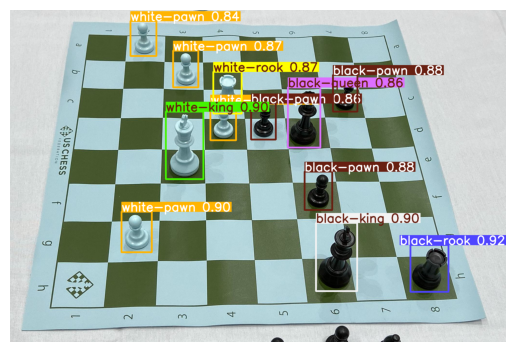

In [2]:
import torch
from PIL import Image
import matplotlib.pyplot as plt
import os
from ultralytics import YOLO

# Load the YOLO model
model_path = os.path.join('.', 'runs', 'detect', 'train2', 'weights', 'best.pt')
model = YOLO(model_path)

# Load the image
# image_path = "C:/Users/Daithoulung Rongmai/Pictures/Screenshots/Screenshot 2024-10-18 002007.png"
# img = Image.open(image_path)

image_path = "C:/Users/Daithoulung Rongmai/KRS(ML)/ProjectRe/Chess-Pieces-23/train/images/889c420fb266b8d0e817306110042bda_jpg.rf.02d22a79820be51228296021ad0b6bbb.jpg"
img = Image.open(image_path)

# Run inference
results = model.predict(img)  # Adjust to .predict() if .predict() is required for this package

# Display results
for result in results:
    # Check if the result has an `img` attribute for direct visualization
    if hasattr(result, 'img'):
        plt.imshow(result.img)
        plt.axis('off')
        plt.show()
    else:
        # If the result is an image array, you can visualize it directly
        img_np = result.plot() if hasattr(result, 'plot') else result  # Adjust based on the available method
        plt.imshow(img_np)
        plt.axis('off')
        plt.show()



0: 800x800 2 black-knights, 2 black-rooks, 26.0ms
Speed: 7.0ms preprocess, 26.0ms inference, 116.0ms postprocess per image at shape (1, 3, 800, 800)
The chess piece at center (471, 169) is in grid: g6
The chess piece at center (317, 174) is in grid: e6
The chess piece at center (555, 270) is in grid: h5
The chess piece at center (218, 319) is in grid: c4


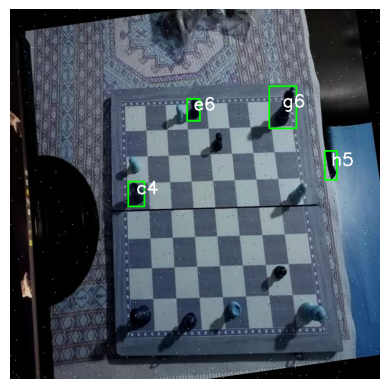

In [1]:
import cv2
import numpy as np
import torch
from PIL import Image
import matplotlib.pyplot as plt
import os
from ultralytics import YOLO

# Load the YOLO model
model_path = os.path.join('.', 'runs', 'detect', 'train_CP', 'weights', 'best.pt')
model = YOLO(model_path)

# Load the image
image_path = "C:/Users/Daithoulung Rongmai/KRS(ML)/ProjectRe/Chess-Corner-Detection-1/train/images/IMG_20230913_195331_jpg.rf.244026d2812d546e381b3c61c80cd99a.jpg"
img = Image.open(image_path)
img_np = np.array(img)

# Run inference
results = model.predict(img)

# Chessboard labels (a-h and 1-8)
columns = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h']
rows_labels = ['1', '2', '3', '4', '5', '6', '7', '8']
rows_labels.reverse()  # Make sure '1' is at the bottom row

# Size of the warped chessboard (after perspective transformation)
grid_size = 600
rows, cols = 8, 8
cell_width = grid_size // cols
cell_height = grid_size // rows

# Assume we have already transformed the image and got the warped image with the grid
warped_image = img_np.copy()  # Placeholder for the actual warped image

# Process the detected chess piece bounding boxes
for result in results:
    boxes = result.boxes.xyxy.cpu().numpy()  # Extract bounding box coordinates (x_min, y_min, x_max, y_max)

    for box in boxes:
        x_min, y_min, x_max, y_max = box

        # Calculate the center of the bounding box
        center_x = int((x_min + x_max) / 2)
        center_y = int((y_min + y_max) / 2)

        # Check which grid cell the center point falls into
        grid_col = center_x // cell_width  # Which column
        grid_row = center_y // cell_height  # Which row

        # Assign the corresponding chess label
        if 0 <= grid_col < cols and 0 <= grid_row < rows:
            grid_label = columns[grid_col] + rows_labels[grid_row]
            print(f"The chess piece at center ({center_x}, {center_y}) is in grid: {grid_label}")

        # Optionally: Draw the bounding box and grid label on the warped image
        cv2.rectangle(warped_image, (int(x_min), int(y_min)), (int(x_max), int(y_max)), (0, 255, 0), 2)
        cv2.putText(warped_image, grid_label, (center_x, center_y), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)

# Display the warped image with labeled bounding boxes
plt.imshow(cv2.cvtColor(warped_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()
